##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Face Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect face landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [ ]:
!pip install -q mediapipe

Then download the off-the-shelf model bundle(s). Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker#models) for more information about these model bundles.

In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

## Visualization utilities

In [ ]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):

    face_landmarks_list = detection_result.face_landmarks
    annotated_image = np.copy(rgb_image)
    for idx in range(len(face_landmarks_list)):
        face_landmarks = face_landmarks_list[idx]
  # Loop through the detected faces to visualize.


    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

    return annotated_image , face_landmarks_proto

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

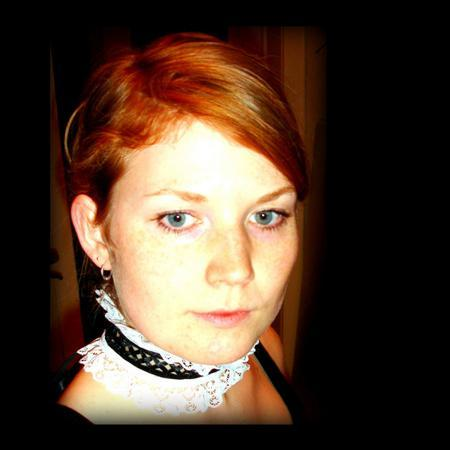

In [ ]:
!wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

import cv2
from google.colab.patches import cv2_imshow
img_path = "image04345.jpg"
img = cv2.imread(img_path)
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded:
  content = uploaded[filename]
  with open(filename, 'wb') as f:
    f.write(content)
if len(uploaded.keys()):
  IMAGE_FILE = next(iter(uploaded))
  print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run face landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker/python) to learn more about configuration options that this task supports.


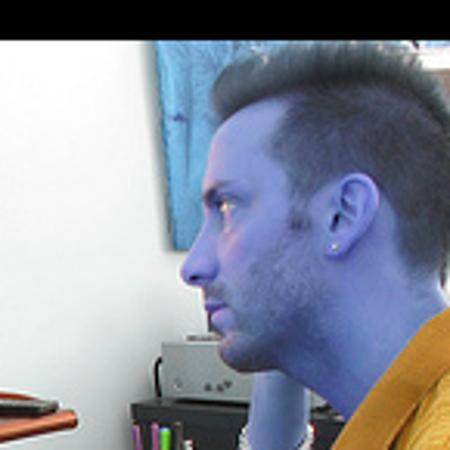

SyntaxError: 'break' outside loop (<ipython-input-113-12579db9226b>, line 25)

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)
noface =0
# STEP 3: Load the input image.
img = mp.Image.create_from_file(img_path)
cv2_imshow(img.numpy_view())
# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(img)
if len(detection_result.face_landmarks) == 0:
    print("No face landmarks detected.")
    noface+=1

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image , face_landmarks_proto = draw_landmarks_on_image(img.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

We will also visualize the face blendshapes categories using a bar graph.

In [ ]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

And print the transformation matrix.

In [ ]:
print(detection_result.facial_transformation_matrixes)

In [ ]:

R = detection_result.facial_transformation_matrixes[0][:3,:3]

if abs(R[2, 0]) != 1:
        # Standard case where pitch is between -90 and 90 degrees
        pitch = -np.arcsin(R[2, 0])  # theta (pitch)
        yaw = np.arctan2(R[1, 0], R[0, 0])  # psi (yaw)
        roll = np.arctan2(R[2, 1], R[2, 2])  # phi (roll)
else:
    # Gimbal lock case
    if R[2, 0] == -1:
        pitch = np.pi / 2
        yaw = np.arctan2(-R[0, 1], R[0, 2])
        roll = 0
    else:
        pitch = -np.pi / 2
        yaw = np.arctan2(R[0, 1], R[0, 2])
        roll = 0

pitch = pitch*180
yaw = yaw*180
roll = roll*180

print("Pitch:", pitch)
print("Yaw:", yaw)
print("Roll:", roll)

Pitch: 50.369396763816646
Yaw: 3.9345366792464107
Roll: 44.381266266333945


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(img_path)


# Assuming face_landmarks_proto is obtained from your face landmark detection
# Convert landmarks to a list of (x, y, z) tuples
landmarks_data = [(lm.x, lm.y, lm.z) for lm in face_landmarks_proto.landmark]

# Convert to NumPy array if needed
landmarks_array = np.array(landmarks_data)

# Print landmarks array

# Access specific landmarks using indexing
left_eyebrow_landmarks = [landmarks_array[i] for i in range(33, 133)]
right_eyebrow_landmarks = [landmarks_array[i] for i in range(362, 464)]

# Compute average position for left and right eyebrow
left_eyebrow_avg = np.mean(left_eyebrow_landmarks, axis=0)
right_eyebrow_avg = np.mean(right_eyebrow_landmarks, axis=0)
avg_position = ((left_eyebrow_avg[0] + right_eyebrow_avg[0]) / 2, (left_eyebrow_avg[1] + right_eyebrow_avg[1]) / 2)
w, h, _ = img.shape
avg_position = (int(avg_position[0] * w), int(avg_position[1] * h))
print(avg_position)



In [ ]:


center = avg_position
length = 100
line_thickness = 3


yaw_end = (int(center[0] + length * np.cos(np.radians(yaw))),
           int(center[1] - length * np.sin(np.radians(yaw))))

pitch_end = (int(center[0] + length * np.sin(np.radians(pitch))),
             int(center[1] - length * np.cos(np.radians(pitch))))

roll_end = (int(center[0] + length * np.cos(np.radians(roll))),
            int(center[1] - length * np.sin(np.radians(roll))))
print(roll_end)
# Create 3 arrowed lines pointing in different directions
cv2.arrowedLine(img, center, yaw_end, (255,0,0), line_thickness)
cv2.arrowedLine(img, center, pitch_end, (0,255,0), line_thickness)
cv2.arrowedLine(img, center, roll_end, (0,0,255), line_thickness)

# Display the image with arrowed lines
cv2_imshow(img)
